In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

Q1:Convert datestamp column to a datetime object and Set the datestamp columns as the index of
your DataFrame. Check if there are missing values in each column.


In [2]:
#load the dataset and Convert datestamp column to a datetime object and Set the datestamp columns as the index of the DataFrame
df= pd.read_csv("/content/sample_data/employment.csv",parse_dates=True,index_col="datestamp")

In [3]:
df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [49]:
#To check for missing values
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

Q2:Generate a boxplot to find the distribution of unemployment rate for every industry .

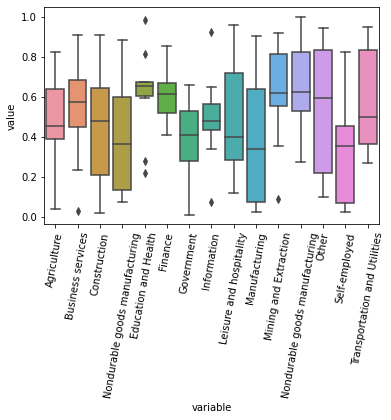

In [21]:
#Plotting boxplots using seaborn
df = pd.DataFrame(data = np.random.random(size=(10,16)), columns = ['Agriculture', 'Business services', 'Construction', 'Nondurable goods manufacturing', 

                'Education and Health', 'Finance', 'Government', 'Information', 'Leisure and hospitality', 

                'Manufacturing', 'Mining and Extraction', 'Nondurable goods manufacturing', 'Other', 

                'Self-employed', 'Transportation and Utilities', 'Wholesale and Retail Trade'])

a=sns.boxplot(x="variable", y="value", data=pd.melt(df))
a.set_xticklabels(['Agriculture', 'Business services', 'Construction', 'Nondurable goods manufacturing', 

                'Education and Health', 'Finance', 'Government', 'Information', 'Leisure and hospitality', 

                'Manufacturing', 'Mining and Extraction', 'Nondurable goods manufacturing', 'Other', 

                'Self-employed', 'Transportation and Utilities', 'Wholesale and Retail Trade'],rotation=80)
display(a)

Q3:Using line chart Visualize the unemployment rate of workers by industry .

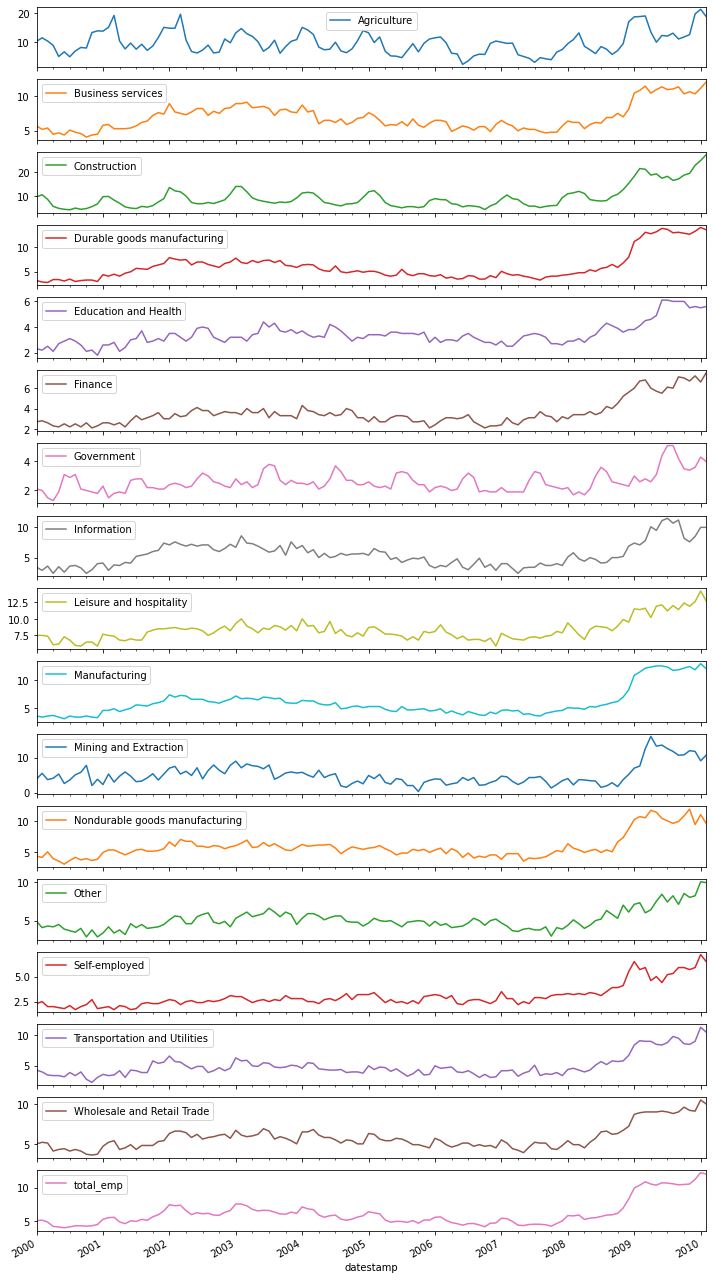

In [35]:
# Visualize the unemployment rate of workers by industry using the line chart
df.plot(subplots=True,figsize=(12,25))
plt.show()

Q4:Plot the monthly and yearly trends .

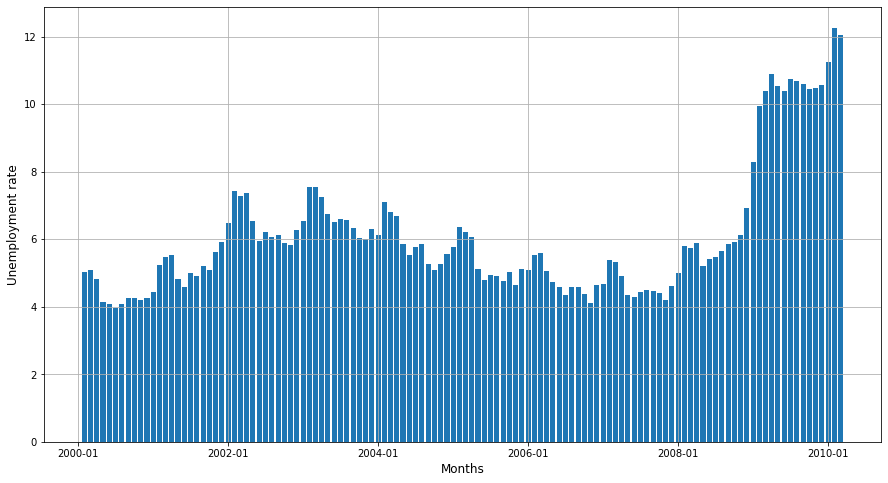

In [4]:
#MONTHLY TREND
df["total_emp"] = df.sum(axis=1)/(len(list(df))-1)  #finding the average for every row and extracting a separate column for it
df_month = df.resample("M").mean()  #resampling as per month
fig, ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #specify the format of dates to be displayed on the X-axis
ax.bar(df_month['2000':].index, df_month.loc['2000':, "total_emp"], width=25, align='center') #specify the timeframe for the visualization
plt.xlabel("Months",fontsize = 12)  #setting the X-label
plt.ylabel("Unemployment rate",fontsize = 12) #setting the Y-label
plt.grid()  #plotting the grid
plt.show()  #display the plot

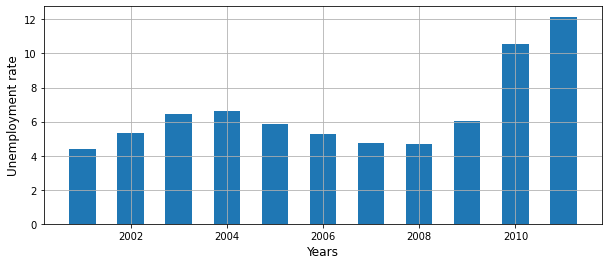

In [7]:
#YEARLY TREND
df["total_emp"] = df.sum(axis=1)/(len(list(df))-1)  #finding the average for every row and extracting a separate column for it
df_year = df.resample("Y").mean()  #resampling as per year
fig, ax = plt.subplots(figsize=(10,4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #specify the format of dates to be displayed on the X-axis
ax.bar(df_year['2000':].index, df_year.loc['2000':, "total_emp"], width=200, align='center')  #specify the timeframe for the visualization
plt.xlabel("Years",fontsize = 12)  #setting the X-label
plt.ylabel("Unemployment rate",fontsize = 12) #setting the Y-label
plt.grid()  #plotting the grid
plt.show()  #display the plot

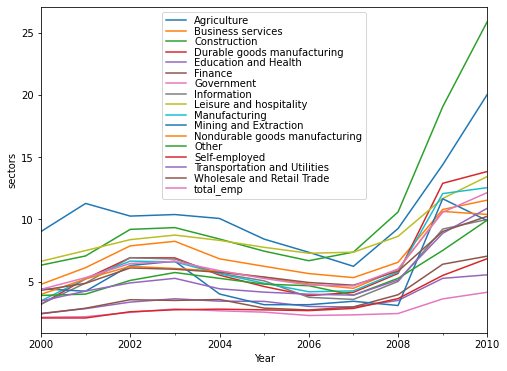

In [9]:
#line chart for sector-wise yearly trend
df_year = df.resample("Y").mean()
df_year.plot(figsize=(8,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # used to set the formatter of the major ticker
#using for loop to iterarte through each sector for every year
for sectors in df:
  ax.bar(df_year['2000':].index,df_year.loc['2000':,sectors],width=25,align='center')
  plt.legend(loc="upper center", labelspacing=0.05)
  plt.xlabel("Year")
  plt.ylabel("sectors")

Q5:Apply time series decomposition to your dataset to visualize the trend and seasonality .

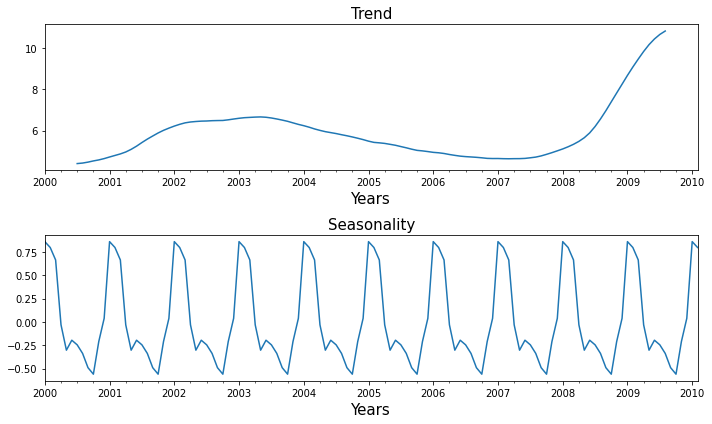

In [15]:
#Importing required libraries
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(df_month["total_emp"], model='Additive')
#trend
plt.subplot(2,1,1)
fig = decomposition.trend.plot()
plt.title('Trend',fontsize = 15)
plt.xlabel("Years",fontsize = 15)
#seasonality
plt.subplot(2,1,2)
fig = decomposition.seasonal.plot()
plt.title('Seasonality',fontsize = 15)
plt.xlabel("Years",fontsize = 15)

plt.tight_layout()
plt.show()

Q6:Visualize the seasonality of Agriculture, Health and Finance sector.

Text(0.5, 1.0, 'Seasonality In Agriculture Sector')

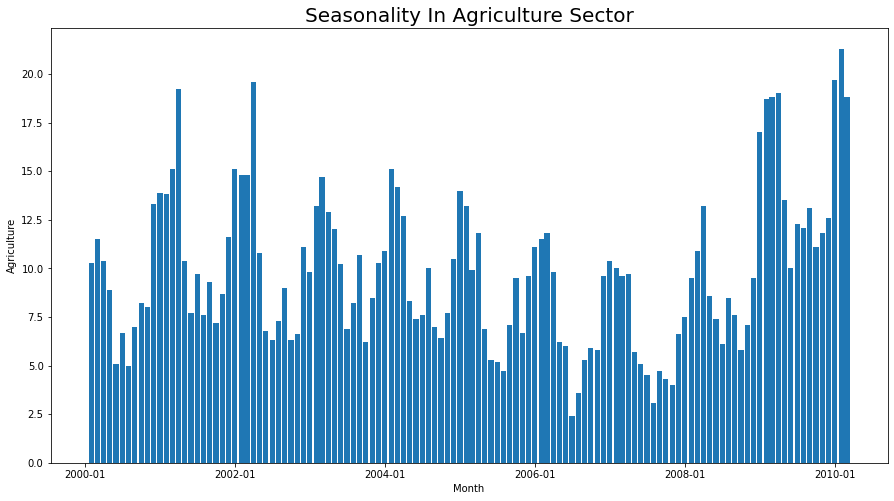

In [32]:
#Agriculture sector 
fig,ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))   # used to set the formatter of the major ticker
ax.bar(df_month['2000':].index,df_month.loc['2000':,"Agriculture"],width=25,align='center')
plt.xlabel("Month")
plt.ylabel("Agriculture")
plt.title("Seasonality In Agriculture Sector",fontsize=20)

Text(0.5, 1.0, 'Seasonality Health Sector')

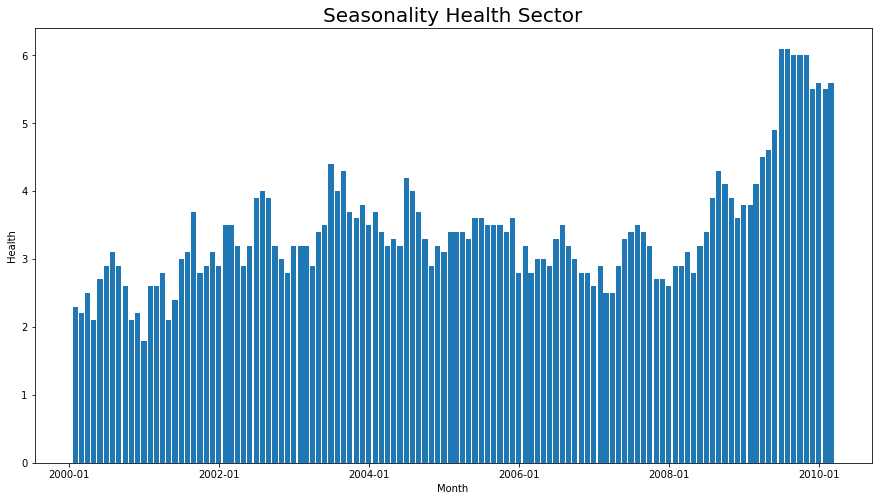

In [33]:
#Health sector
df_month = df.resample("M").mean()
fig,ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))# used to set the formatter of the major ticker
ax.bar(df_month['2000':].index,df_month.loc['2000':,"Education and Health"],width=25,align='center')
plt.xlabel("Month")
plt.ylabel("Health")
plt.title("Seasonality Health Sector",fontsize=20)

Text(0.5, 1.0, 'Seasonality In Finance Sector')

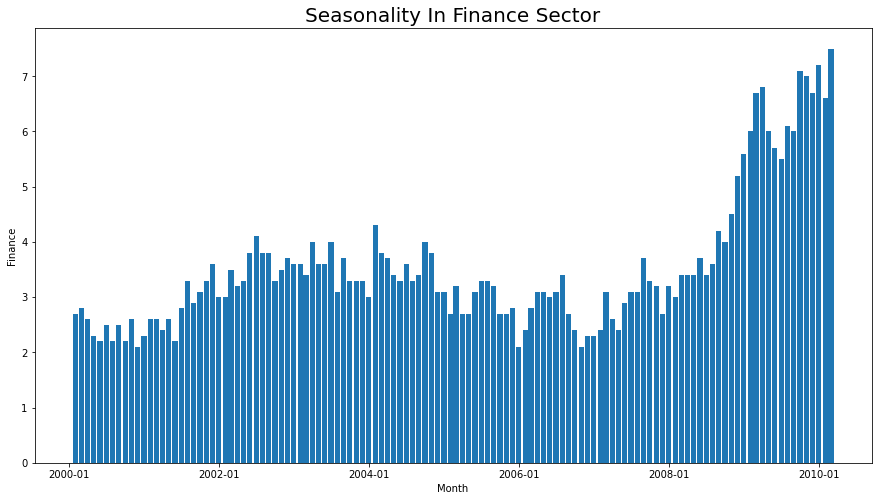

In [34]:
#Finance sector
fig,ax = plt.subplots(figsize=(15,8))
#pt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))# used to set the formatter of the major ticker
ax.bar(df_month['2000':].index,df_month.loc['2000':,"Finance"],width=25,align='center')
plt.xlabel("Month")
plt.ylabel("Finance")
plt.title("Seasonality In Finance Sector",fontsize=20)

Q7:Visualize the seasonality of multiple time series and the correlation between each time series
in the dataset.


In [21]:
df["total_emp"] = df.sum(axis=1)/(len(list(df))-1)
df_month = df.resample("M").mean() #Resampling month wise
df_quarter = df.resample("Q").mean() #Resampling quarter wise
df_year = df.resample("Y").mean() #Resampling year wise


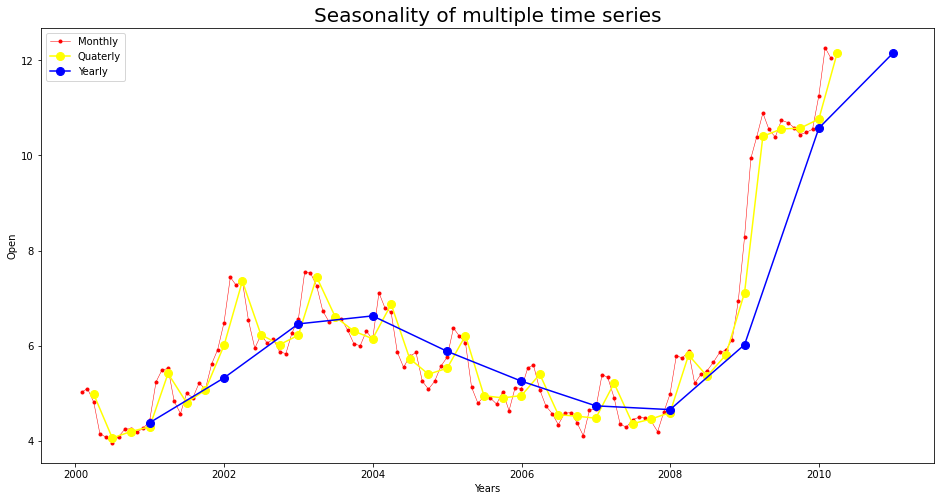

In [31]:
#Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_month.loc[:, 'total_emp'], marker='.', linestyle='-', linewidth = 0.5, label='Monthly', color='red') #seasonality month wise
ax.plot(df_quarter.loc[:, 'total_emp'], marker='o', markersize=8, linestyle='-', label='Quaterly', color='yellow')  #seasonality quarter wise
ax.plot(df_year.loc[:, 'total_emp'], marker='o', markersize=8, linestyle='-', label='Yearly', color='blue') #seasonality year wise
ax.set_ylabel("Open")
ax.legend()
plt.title("Seasonality of multiple time series",fontsize=20)
plt.xlabel("Years")
plt.show()